In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

-1.4779204122407046
0.04192002010626462
Confusion Matrix:
[[6 1]
 [0 5]]
0.9166666666666666
55 0.004135698533414445 0.6958643014665855
decision boundry:  55
predict 49K: [1]
Probability of y=1 for x=46: 0.610734455198959


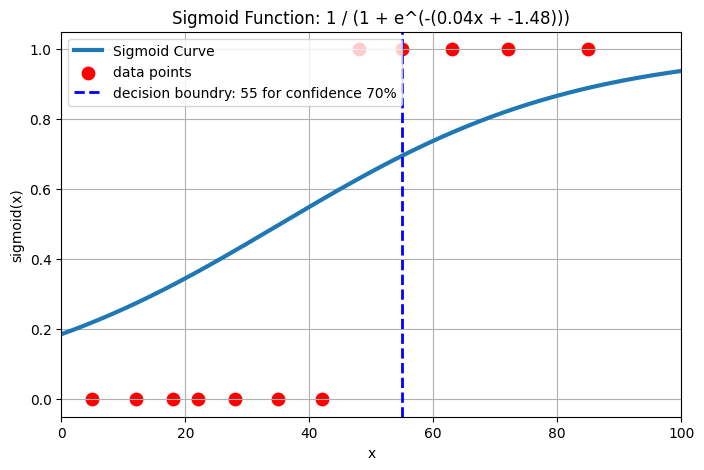

In [39]:
from sklearn.metrics import confusion_matrix

#  Train Logistic Regression Model
# Fit a logistic regression model using scikit-learn with solver='liblinear' on the table above
# Print intercept_ and coef_

X = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63, 72, 85]).reshape(-1, 1)
Y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(b0)
print(b1)

# Print the Confusion Matrix
# Use the model to predict all given x values, then print the confusion matrix in text form

y_pred = model.predict(X)

cm = confusion_matrix(Y, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate Accuracy
#Compute and print the model accuracy (in percent)

def get_accuaracy(cm) -> float:
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy
    
acc = get_accuaracy(cm)
print(acc)    

#Find x for Confidence = 0.70

confidence = 0.7
def get_predict(x) -> bool:
    proba = model.predict_proba([[x]])[0][1]
    return proba > confidence 

import math
best_i = None
best_diff = None
best_conf = None
for i in range(0, 100):
    proba = model.predict_proba([[i]])[0][1]
    if not best_diff or best_diff > abs(confidence - proba):
        best_diff = abs(confidence - proba)
        best_i = i
        best_proba = proba
        
print(best_i, best_diff, best_proba)
print("decision boundry: ", best_i)

#Predict for x = 46

print('predict 49K:',  model.predict([[49]]))
print("Probability of y=1 for x=46:",model.predict_proba([[46]])[0][1])

#Plot the Graph and Decision Boundary

X_data = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63, 72, 85])
Y_data = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

X_line = np.linspace(0, 100, 700)
sigmoid = 1 / (1 + np.exp(-(b0 + b1 * X_line)))

plt.figure(figsize=(8, 5))

plt.plot(X_line, sigmoid, linewidth=3, label="Sigmoid Curve")

plt.scatter(X_data, Y_data, color='red', s=80, label="data points")

# decision boundary
plt.axvline(x=best_i, color="blue", linestyle="--", linewidth=2,
            label=f"decision boundry: {best_i} for confidence {confidence*100:.0f}%")

plt.title(f"Sigmoid Function: 1 / (1 + e^(-({b1:.2f}x + {b0:.2f})))")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.xlim(0, 100)
plt.grid(True)
plt.legend()

plt.show()
